In [1]:
# Step A1: imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Step B1: imports
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Step B2: load iris
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)
X_train.shape, X_test.shape


((112, 4), (38, 4))

In [4]:
# Step B3: fit tree (start shallow to avoid overfit)
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

print("Train accuracy:", tree.score(X_train, y_train))
print("Test  accuracy:", tree.score(X_test,  y_test))


Train accuracy: 0.9642857142857143
Test  accuracy: 0.8947368421052632


In [5]:
# Step B4: predictions & metrics
y_pred = tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nReport:\n", classification_report(y_test, y_pred, target_names=target_names))


Accuracy: 0.8947368421052632

Confusion matrix:
 [[12  0  0]
 [ 0 12  1]
 [ 0  3 10]]

Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.80      0.92      0.86        13
   virginica       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38



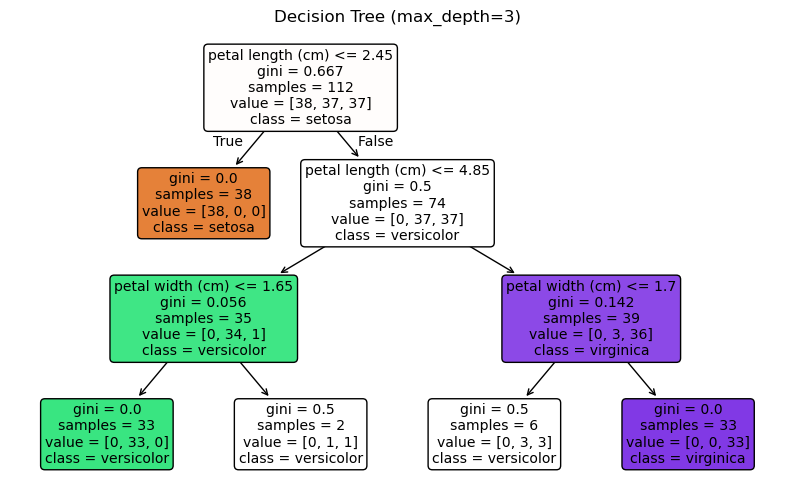

petal length (cm)    0.950732
petal width (cm)     0.049268
sepal width (cm)     0.000000
sepal length (cm)    0.000000
dtype: float64

In [6]:
# Step B5a: plot the tree
plt.figure(figsize=(10,6))
plot_tree(tree, feature_names=feature_names, class_names=target_names,
          filled=True, rounded=True)
plt.title("Decision Tree (max_depth=3)")
plt.show()

# Step B5b: feature importances
imp = pd.Series(tree.feature_importances_, index=feature_names).sort_values(ascending=False)
imp
